In [ ]:
# Yadukrishnan
# 21BAI1210

In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

import seaborn as sn

import tensorflow as tf
from tensorflow import keras

In [4]:
train_set = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
testing_set = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")

In [5]:
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
testing_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_set = np.array(train_set, dtype="float32")
testing_set = np.array(testing_set, dtype="float32")

In [8]:
# For data
X = (train_set[:, 1:])/255.0
y = train_set[:, 0]

# For labels
X_test = (testing_set[:, 1:])/255.0
y_test = testing_set[:, 0]

In [9]:
input_size = (28, 28)
input_shape = (28, 28, 1)

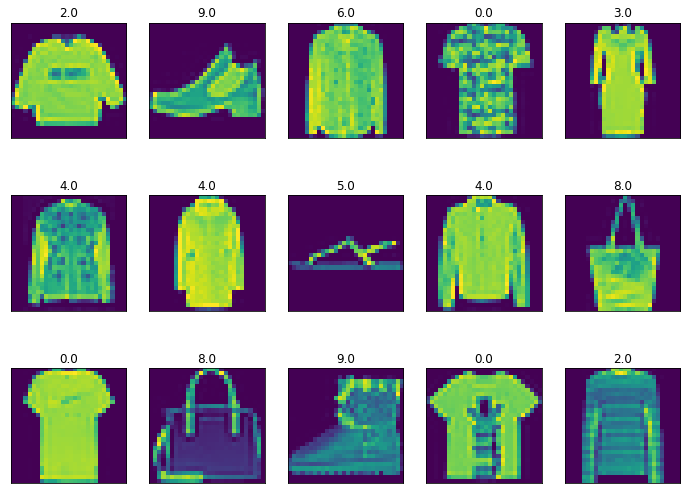

In [10]:
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(input_size))
    plt.title(y[i])
plt.show()

In [11]:
print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [12]:
X = X.reshape(X.shape[0], *input_shape)
X_test = X_test.reshape(X_test.shape[0], *input_shape)

# Transform labels to categorical
y = keras.utils.to_categorical(y)
y_test = keras.utils.to_categorical(y_test)

In [13]:
print(X.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [14]:
def sequential_model(input_shape):
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation="relu",
                           input_shape=input_shape),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ])
    
    model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

In [15]:
k = 6
cross_val = KFold(k, shuffle=True, random_state=1)
fold_count = 1

# For training epochs
epochs = 32

# For loss & acc plotting
histories = []

# For testing/evaluation acc scores
eval_scores = []

# For callbacks
es_callbacks = keras.callbacks.EarlyStopping(monitor="val_loss",
                                          mode="min",
                                          verbose=1,
                                          patience=4)

In [16]:
for train, validation in cross_val.split(X):
    print("="*80)
    print("Fold-{}".format(fold_count))
    print("-"*80)
    print("Training & Validation")
    fold_count = fold_count + 1
    
    model = sequential_model(input_shape)
    
    X_train, y_train = X[train], y[train]
    X_val, y_val = X[validation], y[validation]
    
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        callbacks=[es_callbacks])
    
    print("-"*80)
    print("Testing/evaluation")
    eval_loss, eval_accuracy = model.evaluate(X_test, y_test)
    
    histories.append(history)
    eval_scores.append(eval_accuracy)
    print("_"*80)

Fold-1
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/32
1563/1563 [==============================] - 13s 4ms/step - loss: 0.4788 - accuracy: 0.8249 - val_loss: 0.3431 - val_accuracy: 0.8743
Epoch 2/32
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3142 - accuracy: 0.8870 - val_loss: 0.3004 - val_accuracy: 0.8889
Epoch 3/32
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2652 - accuracy: 0.9035 - val_loss: 0.2757 - val_accuracy: 0.9006
Epoch 4/32
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2315 - accuracy: 0.9136 - val_loss: 0.2626 - val_accuracy: 0.9035
Epoch 5/32
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2041 - accuracy: 0.9252 - val_loss: 0.2515 - val_accuracy: 0.9109
Epoch 6/32
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1767 - accuracy: 0.9341 - val_loss: 0.2482 - val_accuracy: 0.9111
Epoch 7/32
1563/1563 [===

In [17]:
def display_kfold_result(history, k=1):
    # Train & Val Loss
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    # Train & Val Accuracy
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Loss")
    plt.plot(loss, label="Training")
    plt.plot(val_loss, label="Validation")
    plt.legend(loc="upper right")
    
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.plot(accuracy, label="Training")
    plt.plot(val_accuracy, label="Validation")
    plt.legend(loc="lower right")
    
    plt.suptitle("Fold-{}".format(k))
    plt.show()

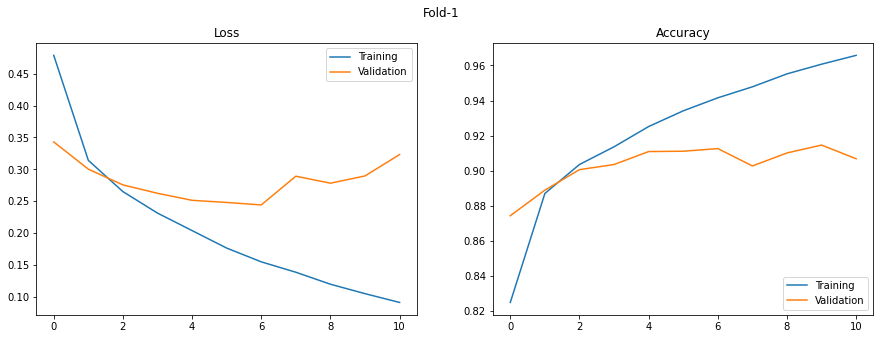

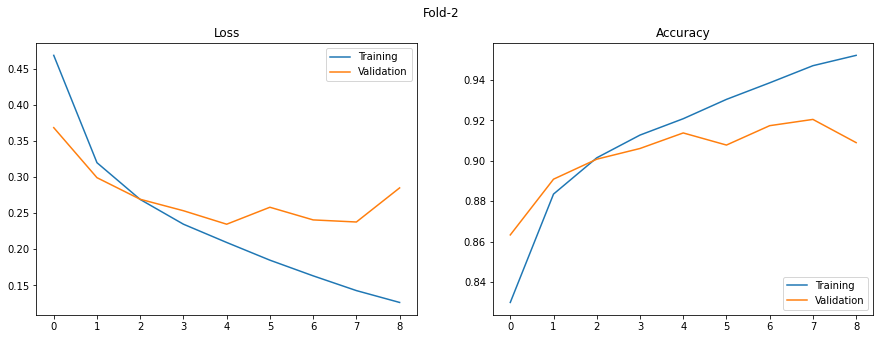

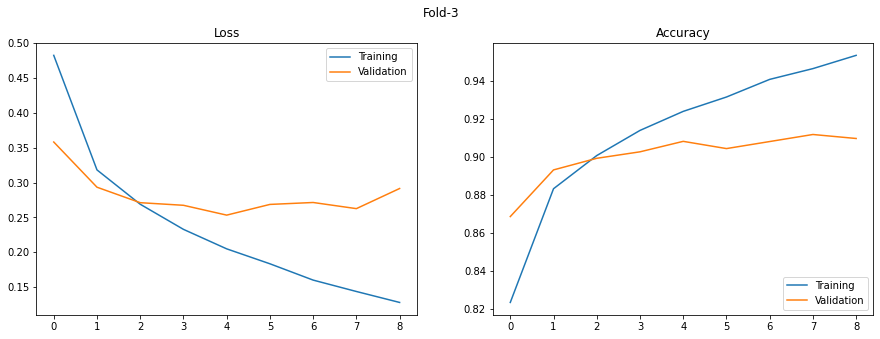

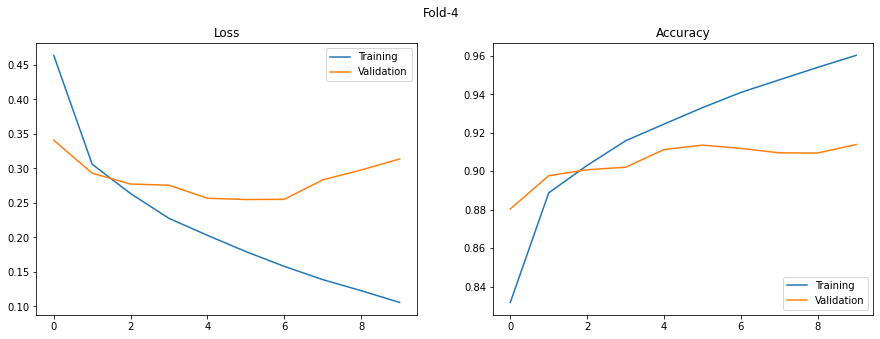

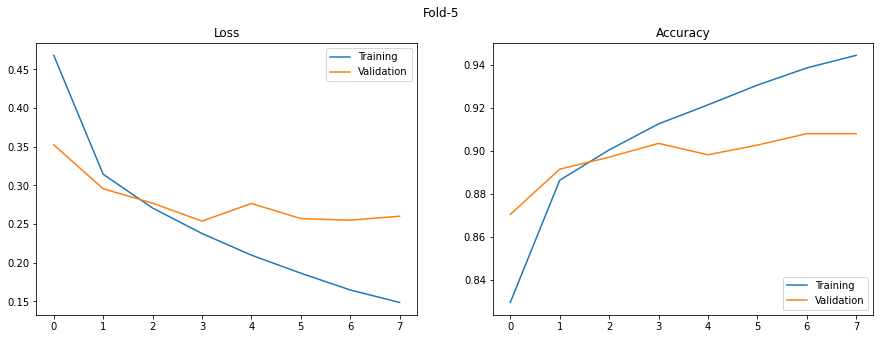

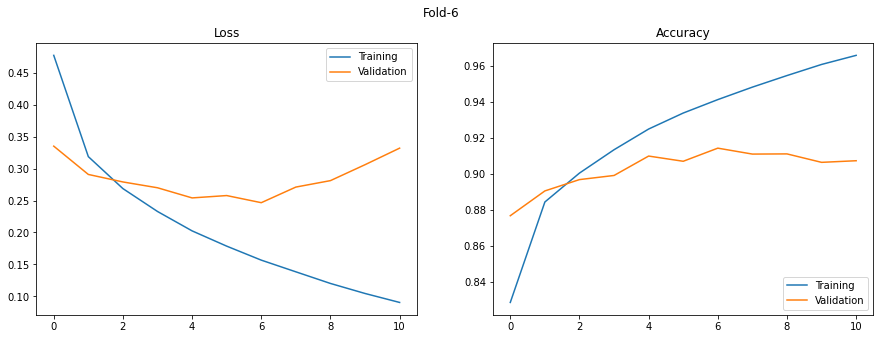

In [18]:
# Displaying the graph results

for history in histories:
    display_kfold_result(history, (histories.index(history)+1))

In [19]:
i = 0
float2 = "{0:.2f}"
for score in eval_scores:
    percent = score * 100
    print("Fold-{}: {}%".format(i+1, float2.format(percent)))
    i = i + 1 #21BAI1210

Fold-1: 90.81%
Fold-2: 91.08%
Fold-3: 91.46%
Fold-4: 92.11%
Fold-5: 91.28%
Fold-6: 91.45%
